# Example Data Analytics

Created by FGL @ 04/03/2025 fglongatt@fglongatt.org

This Notebook reads and plots data.

This notebook requires a data file named: *Carbon_Intensity_Gen_Mix_2009-2025.csv*

The file contains 30-mins resolution data of the Carbon Intensity (grCO2/kWh) and Generation Mix in the Great Britain system from 2009-2025

Data ready to use can be downloaded from:

https://github.com/fglongatt/EPE_650_Energy_Engineering_Technology/blob/main/Carbon_Intensity_Data/Carbon_Intensity_Gen_Mix_2009-2025.zip

**NOTE:** The CSV file must be in the same folder as your Jupyter NoteBook

## Importing the appropriate packages

In [45]:
import pandas as pd
import numpy as np
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
file_name = 'Carbon_Intensity_Gen_Mix_2009-2025.csv'
df = pd.read_csv(file_name )
print(df.head())  # This function returns the first n rows for the object based on position. nint, default 5 

           DATETIME   GAS   COAL  NUCLEAR  WIND  HYDRO  IMPORTS  BIOMASS  \
0  01/01/2009 00:00  8378  15037     7099   293    246     2520        0   
1  01/01/2009 00:30  8510  15095     7087   270    245     2498        0   
2  01/01/2009 01:00  8484  15087     7074   243    246     2467        0   
3  01/01/2009 01:30  8328  15030     7064   225    246     2441        0   
4  01/01/2009 02:00  8303  14998     7052   208    246     2366        0   

   OTHER  SOLAR  ...  IMPORTS_perc  BIOMASS_perc  OTHER_perc  SOLAR_perc  \
0      0      0  ...           7.5           0.0         0.0         0.0   
1      0      0  ...           7.4           0.0         0.0         0.0   
2      0      0  ...           7.3           0.0         0.0         0.0   
3      0      0  ...           7.3           0.0         0.0         0.0   
4      0      0  ...           7.1           0.0         0.0         0.0   

   STORAGE_perc  GENERATION_perc  LOW_CARBON_perc  ZERO_CARBON_perc  \
0           0.0

## Creating individual dataframe for the specific data of Carbon Intensity, Wind Power and Gas Power

In [48]:
xtime = df['DATETIME']
print(xtime)
xtime = pd.to_datetime(df['DATETIME'], format="mixed")
xtime.dt.strftime('%d-%m-%Y %H:%M')
yIntensity=df['CARBON_INTENSITY']
yWind = df['WIND']
yGas= df['GAS']
data = yIntensity

0         01/01/2009 00:00
1         01/01/2009 00:30
2         01/01/2009 01:00
3         01/01/2009 01:30
4         01/01/2009 02:00
                ...       
280507    31/12/2024 21:30
280508    31/12/2024 22:00
280509    31/12/2024 22:30
280510    31/12/2024 23:00
280511    31/12/2024 23:30
Name: DATETIME, Length: 280512, dtype: object


## Plottig the time series

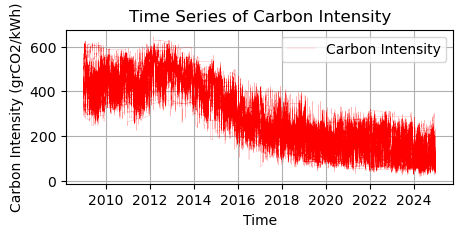

In [50]:
## Plotting the time series
# Plot the time series
plt.figure(figsize=(5, 2))
plt.plot(xtime, yIntensity, label='Carbon Intensity',color='red',linewidth=0.1)
plt.xlabel('Time')
plt.ylabel('Carbon Intensity (grCO2/kWh)')
plt.title('Time Series of Carbon Intensity')
plt.legend()
plt.grid(True)
plt.show()

Calculating the main descriptive statistics:

In [52]:
print(' DESCRIPTIVE STATISTICS ')
print('----------------------------------------------')
mean_value = np.mean(data)
print(" Mean value:", mean_value)
median_value = np.median(data)
print(" Median value:",median_value)
mode_value =  stats.mode(data)
print(' Mode value',mode_value)
variance_sample = np.var(data, ddof = 1) # Sample variance
print(' Variance Sample value:',variance_sample)
std_deviation  = np.std(data, ddof = 1)
print(' Std value:',std_deviation)


 DESCRIPTIVE STATISTICS 
----------------------------------------------
 Mean value: 302.0411283652749
 Median value: 273.0
 Mode value ModeResult(mode=208, count=964)
 Variance Sample value: 21633.363121240207
 Std value: 147.08284441511256


Plotting the histogram of the data

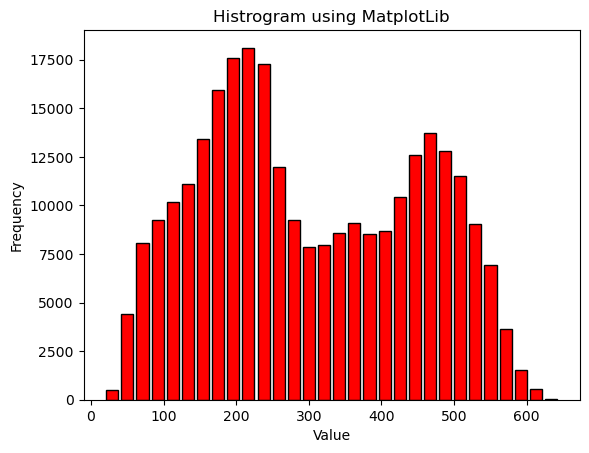

In [54]:
plt.hist(data, bins= 30,edgecolor='black',facecolor='r',rwidth=0.8)
plt.title('Histrogram using MatplotLib')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()